In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [5]:
data = open('../Datasets/sonnets.txt').read()

corpus = data.lower().split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [6]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [7]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [8]:
history = model.fit(predictors, label, epochs=100, verbose=1)

W0808 13:02:40.714148 140735858033536 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 31s 2ms/sample - loss: 6.9203 - accuracy: 0.0217
Epoch 2/100
15462/15462 [==============================] - 30s 2ms/sample - loss: 6.4970 - accuracy: 0.0221
Epoch 3/100
15462/15462 [==============================] - 30s 2ms/sample - loss: 6.4129 - accuracy: 0.0232
Epoch 4/100
15462/15462 [==============================] - 30s 2ms/sample - loss: 6.3012 - accuracy: 0.0279
Epoch 5/100
15462/15462 [==============================] - 29s 2ms/sample - loss: 6.1990 - accuracy: 0.0325
Epoch 6/100
15462/15462 [==============================] - 29s 2ms/sample - loss: 6.1089 - accuracy: 0.0376
Epoch 7/100
15462/15462 [==============================] - 31s 2ms/sample - loss: 6.0280 - accuracy: 0.0387
Epoch 8/100
15462/15462 [==============================] - 29s 2ms/sample - loss: 5.9477 - accuracy: 0.0421
Epoch 9/100
15462/15462 [==============================] - 30s 2ms/sample - loss: 5.8566 - accuracy: 0.0486
Epoch

15462/15462 [==============================] - 28s 2ms/sample - loss: 1.5226 - accuracy: 0.7348
Epoch 77/100
15462/15462 [==============================] - 29s 2ms/sample - loss: 1.5005 - accuracy: 0.7418
Epoch 78/100
15462/15462 [==============================] - 30s 2ms/sample - loss: 1.4795 - accuracy: 0.7451
Epoch 79/100
15462/15462 [==============================] - 29s 2ms/sample - loss: 1.4681 - accuracy: 0.7483
Epoch 80/100
15462/15462 [==============================] - 29s 2ms/sample - loss: 1.4405 - accuracy: 0.7537
Epoch 81/100
15462/15462 [==============================] - 29s 2ms/sample - loss: 1.4230 - accuracy: 0.7569
Epoch 82/100
15462/15462 [==============================] - 30s 2ms/sample - loss: 1.3933 - accuracy: 0.7617
Epoch 83/100
15462/15462 [==============================] - 30s 2ms/sample - loss: 1.3894 - accuracy: 0.7648
Epoch 84/100
15462/15462 [==============================] - 31s 2ms/sample - loss: 1.3744 - accuracy: 0.7663
Epoch 85/100
15462/15462 [======

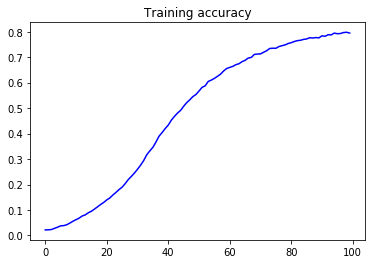

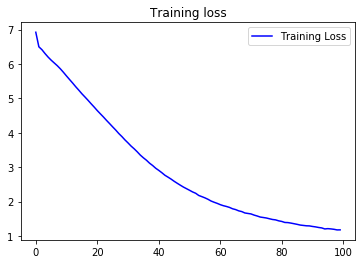

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [11]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope even that my mind men ' now lie so ' was worth of woe which still told me back shines so bright die young young now done call you can dwell did fill thee before heaven live ' alone was a edge of doom and wind borrow'd face parts of men heart ill sight sinful find call old pain show you say for this false is as i be call her men young new tongue hath ill face shows thee alone remains her rhyme face hence near behind a cheer hate age face might dearer face shine deeds was good
